<a href="https://colab.research.google.com/github/jarmstrong22/IDS/blob/main/HW6/Project6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: **Project6_R**
#Author: Jaden
#Date: 12/11/2023

In [1]:
install.packages("rpart")
install.packages("rpart.plot")
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load required libraries
library(rpart)
library(rpart.plot)
library(C50)

In [4]:
# Load training data
loan_test <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv")
loans_training <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv")

In [5]:
# Convert 'Approval' to a factor
loans_training$Approval <- as.factor(loans_training$Approval)

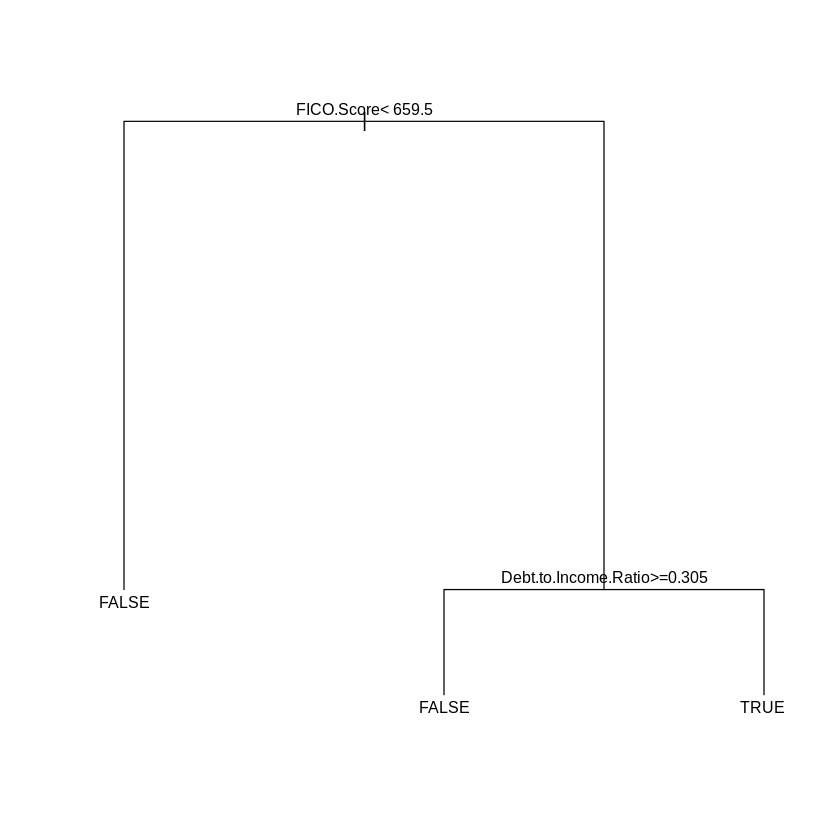

In [6]:
# Create and train CART model
cart_model <- rpart(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest, data = loans_training, method = "class")

# Visualize the decision tree
plot(cart_model)
text(cart_model, cex = 0.8)


In [7]:
# Print the decision tree details
print(cart_model$frame[1:5, ])

                   var      n     wt   dev yval complexity ncompete nsurrogate
1           FICO.Score 150302 150302 75066    2  0.5646498        3          3
2               <leaf>  46002  46002  1808    1  0.0000000        0          0
3 Debt.to.Income.Ratio 104300 104300 30872    2  0.1267551        3          0
6               <leaf>  12873  12873  1679    1  0.0000000        0          0
7               <leaf>  91427  91427 19678    2  0.0000000        0          0
      yval2.V1     yval2.V2     yval2.V3     yval2.V4     yval2.V5
1 2.000000e+00 7.506600e+04 7.523600e+04 4.994345e-01 5.005655e-01
2 1.000000e+00 4.419400e+04 1.808000e+03 9.606974e-01 3.930264e-02
3 2.000000e+00 3.087200e+04 7.342800e+04 2.959923e-01 7.040077e-01
6 1.000000e+00 1.119400e+04 1.679000e+03 8.695720e-01 1.304280e-01
7 2.000000e+00 1.967800e+04 7.174900e+04 2.152318e-01 7.847682e-01
  yval2.nodeprob
1   1.000000e+00
2   3.060638e-01
3   6.939362e-01
6   8.564756e-02
7   6.082886e-01


In [8]:
# Train C5.0 model
c50_model <- C5.0(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest, data = loans_training, control = C5.0Control(minCases = 1000))

# To see the first few splits in C5.0 model
summary(c50_model)

# Compare models
# You can compare the performance metrics, such as accuracy, of both models on the training set or use cross-validation.
# For example:
cart_predictions <- predict(cart_model, loans_training, type = "class")
c50_predictions <- predict(c50_model, loans_training)

# Compare accuracy
cart_accuracy <- sum(cart_predictions == loans_training$Approval) / nrow(loans_training)
c50_accuracy <- sum(c50_predictions == loans_training$Approval) / nrow(loans_training)

cat("CART Model Accuracy:", cart_accuracy, "\n")
cat("C5.0 Model Accuracy:", c50_accuracy, "\n")


Call:
C5.0.formula(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score
 + Request.Amount + Interest, data = loans_training, control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 12 01:04:06 2023
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on traini

CART Model Accuracy: 0.845877 
C5.0 Model Accuracy: 0.8501284 


**Analysis and Conclusion**

---



The first split in the CART model indicates that a Debt-to-Income Ratio greater than 0.3` predicts a  loan denial (FALSE), leading to 1,160 misclassified cases among 19,884. Conversely, the second split emerges for cases with a Debt-to-Income Ratio less than or equal to 0.31, directing attention to the FICO Score. The third split in this branch classifies cases with a FICO Score less than or equal to 655 as loan denials, resulting in 894 misclassifications among 35,346 cases.

**Comparative Analysis**

---



**Similarities:**
Target Variable: Both CART and C5.0 models share a common target variable, predicting the approval status of the loan
Predictors: Consistency exists in the set of predictors used by both models, encompassing "Debt-to-Income Ratio, "Fico Score", and "Request Amount"
**Differences**
Algorithm: The primary distinction arises from the underlying algorithm. CART utilizes a recursive binary split approach, whereas C5.0 employs a different algorithm for decision tree construction.
Minimum Cases per Terminal Node: While the CART model does not specify a minimum number of cases per terminal node, the C5.0 model imposes a minimum requirement of 1,000 cases per terminal node during construction.

**Conclusion**:
In summary, both CART and C5.0 models exhibit differences significantly in the algorithm employed, minimum cases per terminal node, and the structure of their decision trees. Understanding these distinctions is crucial for informed model selection and optimization in the domain of loan approval prediction. Both regardless of their differences arrived at a solution that is close to each other.